In [6]:
%matplotlib inline

In [32]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

In [33]:
def sir(total_pop, beta, gamma):
    """
    beta - infection rate
    gamma - recovery rate
    S = susceptable
    I = infected
    R = recovered 
    """
    I = 200
    S = total_pop - I
    R = 0
    t = 0
    ss = []
    ii = []
    rr = []
    nc = []
    while t < 100:
        ss += [S]
        ii += [I]
        rr += [R]
        
        new_r = gamma * I 
        new_i = beta * S * I
        nc += [new_i]
        R = R + new_r
        I = I + new_i - new_r
        S = S - new_i
        
        t += 1
    return ss, ii, rr, nc

        


In [34]:
def sir_beta(total_pop, initial_beta, gamma, k):
    """
    beta - infection rate per day
    gamma - inverse infection period
    S = susceptable
    I = infected
    R = recovered
    t = time in days
    d = deaths
    k = public sensitivity to deaths (as measured RE 1918 flu pandemic in http://refhub.elsevier.com/S1201-9712(20)30117-X/sbref0015)
    fat = fatality rate
    sev = severe illness rate
    """
    I = 10
    S = total_pop - I
    R = 0
    t = 0
    d = 32
    ss = []
    ii = []
    bbs = []
    rr = []
    nc = []
    fat = 0.025
    sev = 0.2
    sps = sp.Close.values[-len(cases):] / sp.Close.values.max()
    normalizing_constant = total_pop / (R + 1)
    def beta_f():
        if t < 68:
            return initial_beta  * 1 * math.pow(1 - R / total_pop, k)
        else:
            return initial_beta  * 1 * math.pow(1 - R / total_pop, k)
    while t < 150:
        ss += [S]
        ii += [I]
        rr += [R]
        d = R * fat
        c = R * sev
        beta = beta_f()
        bbs.append(beta)
        new_r = gamma * I 
        new_i = beta * S * I / total_pop
        nc += [new_i]
        S = S - new_i
        I = I + new_i - new_r
        R = R + new_r
        t += 1
    return ss, ii, rr, bbs, nc

In [65]:
import json
import requests
import pandas as pd
from datetime import date, timedelta
from io import StringIO

populations = {"US": 330430597,
               "Hubei": 58500000,
               "Italy":  60487434,
               "Korea":  51256442}
               
               

def fetch_cdc_cases():
    epi_data = requests.get('https://www.cdc.gov/coronavirus/2019-ncov/us-cases-epi-chart.json')
    epi_json = epi_data.json()
    cases = [int(k) for k in epi_json['data']['columns'][1][1:]]
    dates = [date(day=int(d.split('/')[1]), 
                      month=int(d.split('/')[0]),
                      year=int(d.split('/')[2])) for d in epi_json['data']['columns'][0][1:]]
    return dates, cases

def fetch_johnshopkins_totals():
    epi_data = requests.get('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
    epi_json = pd.read_csv(StringIO(epi_data.text))
    epi_json = epi_json.groupby(['Country/Region']).sum()

    us_info = epi_json[epi_json.index == 'US']
    
    vals = us_info.values[0][3:]
    days = [date(day=int(d.split('/')[1]), 
                      month=int(d.split('/')[0]),
                      year=int(d.split('/')[2])) for d in us_info.columns[3:]]
    return days, vals
    
    
def fetch_johnshopkins_byday():
    epi_data = requests.get('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
    epi_json = pd.read_csv(StringIO(epi_data.text))
    epi_json = epi_json.groupby(['Country/Region']).sum()
    us_info = epi_json[epi_json.index == 'US']
    vals = us_info.values[0][3:] - us_info.values[0][2:-1]
    days = us_info.columns[3:]
    return days, vals

print(fetch_johnshopkins_byday())


(Index(['1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20',
       '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20',
       '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20',
       '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20',
       '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20',
       '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20',
       '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20'],
      dtype='object'), array([0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.00

In [103]:
cases = np.array([0.000001,0.00001,1,0.00001,1,0.00001,3,1,1,3,2,0.00001,0.00001,5,10,6,7,11,14,13,34,16,30,19,40,40,53,51,48,58,74,43,79,46,50,15,2,0.00001])
dates, cases = fetch_johnshopkins_byday()
cases = np.array(cases[25:])

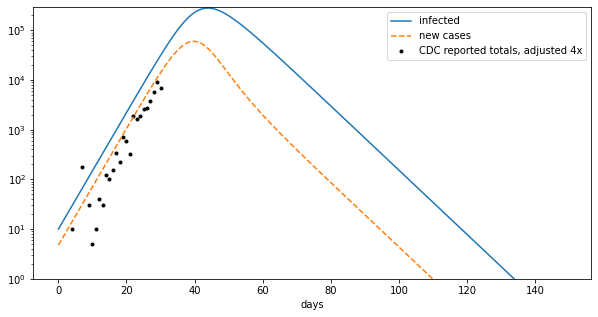

peak infected patients of 279496 on 2020-04-01
peak new cases of 59980 on day 2020-03-28
0.25276659629675297% of population, 884683.0870386354 were infected at one point by day 150
17693 people die by day 150 (assuming a 2% fatality rate)


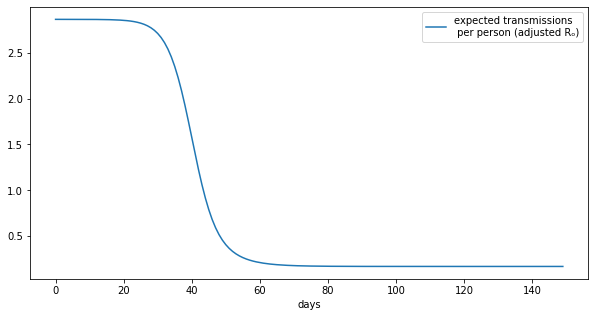

In [104]:
infection_time = 6
sp = pd.read_csv("~/Downloads/^GSPC.csv")
first_date = datetime(day=17, month=2, year=2020).date()
from datetime import datetime, timedelta
inverse_time = 1 / infection_time 
s, i, r, b, n = sir_beta(350000000, 0.477, inverse_time, 1113)
t = np.array(range(0, 150))
plt.figure(figsize=(10,5))


plt.plot(t , i, label='infected')
plt.plot(t, np.array(n), '--', label='new cases')
plt.scatter(t[:len(cases)], cases[:] * 5, marker='.', c='k', label='CDC reported totals, adjusted 4x')
# plt.scatter(t[len(cases) - 7: len(cases)], cases[-7:] * 4, marker='x', c='r',label='incomplete totals, adjusted 10x (CDC)')
plt.ylim(bottom=1) 
plt.yscale('log')
plt.xlabel('days')
plt.legend(loc='upper right')
plt.show()



print("peak infected patients of {0} on {1}".format(int(max(i)), timedelta(days=int(np.argmax(i))) + first_date))
print("peak new cases of {0} on day {1}".format(int(max(n)), timedelta(days=int(np.argmax(n))) + first_date))
print("{}% of population, {} were infected at one point by day {}".format(max(r) / (float(s[0] + i[0] + r[0])) * 100, max(r), len(r)) )
print("{} people die by day {} (assuming a 2% fatality rate)".format( int(max(r) * 0.02), len(r)))
plt.figure(figsize=(10,5))

plt.plot(t, [a / inverse_time for a in b], label='expected transmissions \n per person (adjusted Rₒ)')
plt.legend()
plt.xlabel('days')

plt.show()


In [806]:
s, i, r = sir(8500000, (1 / 8500000.0) * 0.5, 0.2)

ValueError: too many values to unpack (expected 3)

ValueError: x and y must have same first dimension, but have shapes (100,) and (150,)

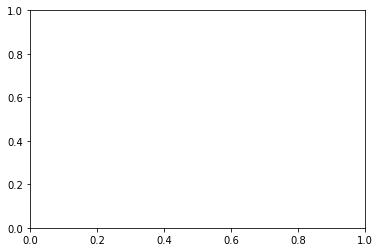

In [432]:
t = range(0, 100)
plt.plot(t, s, label='susceptable')
plt.plot(t, i, label='infected')
plt.plot(t, r, label='recovered')
plt.legend()
plt.show()
print("peak infections of {0} at day {1}".format(int(max(i)), np.argmax(i)))
print("{}% of population was infected at one point by day {}".format(max(r) / (float(s[0] + i[0] + r[0])) * 100, len(r)) )
print("{} people die by day 100 (assuming 2% fatality rate)".format( int(max(r) * 0.02)))

2019-01-09


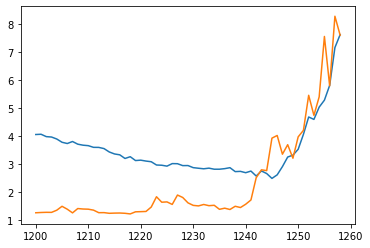

In [150]:
vix = pd.read_csv("/home/sam/Downloads/^VIX.csv") 
tvix = pd.read_csv("/home/sam/Downloads/TVIX(1).csv")
plt.plot(tvix.Close[1200:]/vix.Close[1200:])
plt.plot(vix.Close[1200:] / 10)
print(vix.Date[960])